# Estudio de diferentes modelos de SVM

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip3 install roc_utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importar dependencias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
# Cargar el nuevo dataset.
Datos = pd.read_excel('/content/drive/MyDrive/AB Proyecto/MI_cleandata_new.xlsx', sheet_name='Hoja1', index_col=0)
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 1648
Columns: 116 entries, AGE to zab_leg_06
dtypes: float64(5), int64(111)
memory usage: 1.5 MB


En la exploración inicial se ha determinado que las variables que presentan una relación con la variable ZSN són: AGE, ZSN_A, OTEK_LANC, endocr_01, zab_leg_01, ALT_BLOOD Y ROE.

A continuación, se procede a crear modelos basados en el classificador SVM, con las siguientes combinaciones de variables seleccionadas.

Combinación 1:
AGE, ALT_BLOOD

Combinación 2:
AGE, ALT_BLOOD, ZSN_A, ROE

Combinación 3:
AGE, ZSN_A, OTEK_LANC, SEX, ALT_BLOOD

Combinación 4:
AGE, ZSN_A, OTEK_LANC, endocr_01, zab_leg_01

Los hiperparámetros se escogeran usando la herramienta GridSearch de scikit-learn.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Crear numpy arrays con las diferentes variables escogidas como "features".
AGE = Datos['AGE'][:, np.newaxis]
ALT_BLOOD = Datos['ALT_BLOOD'][:, np.newaxis]
ZSN_A = Datos['ZSN_A'][:, np.newaxis]
OTEK_LANC = Datos['OTEK_LANC'][:, np.newaxis]
SEX = Datos['SEX'][:, np.newaxis]
endocr_01 = Datos['endocr_01'][:, np.newaxis]
zab_leg_01 = Datos['zab_leg_01'][:, np.newaxis]
ROE = Datos['ROE'][:, np.newaxis]

# Imprimir forma de los arrays para verificar que se han creado correctamente.
print(AGE.shape)
print(ALT_BLOOD.shape)
print(ZSN_A.shape)
print(OTEK_LANC.shape)
print(SEX.shape)
print(endocr_01.shape)
print(zab_leg_01.shape)
print(ROE.shape)

(1649, 1)
(1649, 1)
(1649, 1)
(1649, 1)
(1649, 1)
(1649, 1)
(1649, 1)
(1649, 1)


In [ ]:
# Crear numpy arrays con los "labels" de variable a predecir.
ZSN = Datos['ZSN']

# Imprimir forma del array para verificar que se ha creado correctamente.
print(ZSN.shape)

(1649,)


A continuación, se crearan 6 arrays de features, creados a partir de las 6 combinaciones posibles a generar a partir de la unión de las 3 variables.

In [ ]:
from numpy.core.multiarray import concatenate

# Crear los 4 arrays de features a partir de las combinaciones de las 7 variables:

# Combinación 1:
X_1 = np.concatenate((AGE, ALT_BLOOD), axis=1)

# Combinación 2:
X_2 = np.concatenate((AGE, ALT_BLOOD, ZSN_A, ROE), axis=1)

# Combinación 3:
X_3 = np.concatenate((AGE, ZSN_A, OTEK_LANC, SEX, ALT_BLOOD), axis=1)

# Combinación 4:
X_4 = np.concatenate((AGE, ZSN_A, OTEK_LANC, endocr_01, zab_leg_01), axis=1)

# Imprimir forma de los arrays para verificar que se han creado correctamente.
print(X_1.shape)
print(X_2.shape)
print(X_3.shape)
print(X_4.shape)

(1649, 2)
(1649, 4)
(1649, 5)
(1649, 5)


In [ ]:
# Definir el array de labels de la variable a predecir.
y = ZSN

A continuación, se procede a crear un modelo para cada una de las 6 combinaciones. Los pasos a seguir són:

1.- Dividir los datos.

2.- Escalamiento de datos.

3.- Efectuar un GridSearch para encontrar los mejores hiperparámetros especificos para el modelo en cuestión.

4.- Entrenamiento del modelo.

5.- Análisis de los resultados obtenidos: Classification report, matrix de confusión y curva ROC.

6.- Validación cruzada con K-fold.


## Modelo 1: Combinación 1

### Dividir los datos

In [ ]:
from sklearn.model_selection import train_test_split

X = X_1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Escalamiento de datos

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.fit_transform(X_test)

### Optimización de hiperparámetros

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Combinaciones de hiperparámetros a estudiar.
param_grid = {'C': [0.001, 0.1, 1, 10, 100],
              'gamma': ['auto', 1, 0.01, 0.0001, 0.00001],
              'kernel': ['sigmoid'],
              'coef0': [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]}

# Crear el grid.
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# Iniciar la búsqueda de la mejor combinación de hiperparámetros.
grid.fit(X_train_scal, y_train)

Fitting 5 folds for each of 275 candidates, totalling 1375 fits
[CV 1/5] END C=0.001, coef0=-5, gamma=auto, kernel=sigmoid;, score=0.769 total time=   0.1s
[CV 2/5] END C=0.001, coef0=-5, gamma=auto, kernel=sigmoid;, score=0.769 total time=   0.1s
[CV 3/5] END C=0.001, coef0=-5, gamma=auto, kernel=sigmoid;, score=0.765 total time=   0.2s
[CV 4/5] END C=0.001, coef0=-5, gamma=auto, kernel=sigmoid;, score=0.765 total time=   0.1s
[CV 5/5] END C=0.001, coef0=-5, gamma=auto, kernel=sigmoid;, score=0.768 total time=   0.1s
[CV 1/5] END C=0.001, coef0=-5, gamma=1, kernel=sigmoid;, score=0.769 total time=   0.1s
[CV 2/5] END C=0.001, coef0=-5, gamma=1, kernel=sigmoid;, score=0.769 total time=   0.1s
[CV 3/5] END C=0.001, coef0=-5, gamma=1, kernel=sigmoid;, score=0.765 total time=   0.1s
[CV 4/5] END C=0.001, coef0=-5, gamma=1, kernel=sigmoid;, score=0.765 total time=   0.1s
[CV 5/5] END C=0.001, coef0=-5, gamma=1, kernel=sigmoid;, score=0.768 total time=   0.2s
[CV 1/5] END C=0.001, coef0=-5,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 1, 10, 100],
                         'coef0': [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5],
                         'gamma': ['auto', 1, 0.01, 0.0001, 1e-05],
                         'kernel': ['sigmoid']},
             verbose=3)

In [ ]:
# Visualizar los mejores parámetros.
print(grid.best_params_)

{'C': 0.001, 'coef0': -5, 'gamma': 'auto', 'kernel': 'sigmoid'}


### Entrenamiento del modelo

In [ ]:
# Creación del modelo SVC.
model = SVC(C=0.001, coef0=-5, gamma='auto', kernel='sigmoid', probability=True)

# Entrenamiento.
model.fit(X_train_scal, y_train)

SVC(C=0.001, coef0=-5, gamma='auto', kernel='sigmoid', probability=True)

### Evaluación del modelo

####Evaluación de los resultados del entrenamiento

In [ ]:
from sklearn.metrics import accuracy_score

# Accuracy y error de entrenamiento.
y_train_pred = model.predict(X_train_scal)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_err = 1-train_accuracy

print("Accuracy: {} \nTrainig error: {}".format(train_accuracy, train_err))

Accuracy: 0.7672479150871873 
Trainig error: 0.23275208491281274


In [ ]:
# Función para visualizar la matrix de confusión
def plot_cm(Y, y_pred,clf):
    cm = confusion_matrix(Y, y_pred)
    cm_df = pd.DataFrame(cm, index=clf.classes_, columns=clf.classes_)
    cm_df.index.name = 'True'
    cm_df.columns.name = 'Predicted'
    ax=sns.heatmap(cm_df, # Visualizando la matriz de confusion
             annot=True, fmt='2d', cmap='ocean_r',cbar=False,square=True, annot_kws={'fontsize':20})

Classification report
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1012
           1       0.00      0.00      0.00       307

    accuracy                           0.77      1319
   macro avg       0.38      0.50      0.43      1319
weighted avg       0.59      0.77      0.67      1319

 
Matriz de confusión


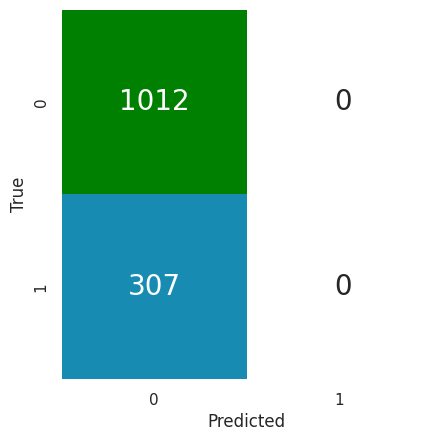

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report.
print('Classification report')
print(classification_report(y_train, y_train_pred))
print(' ')

# Matriz de confusión.
print('Matriz de confusión')
plot_cm(y_train, y_train_pred, clf=model)

In [ ]:
# Funcion para calcular y visualizar la curva ROC.
def curveROC(X,y,model):

    from sklearn.metrics import roc_curve, auc

    y_prob = model.predict_proba(X)
    # calcula fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y, y_prob[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)

    # Calcula el mejor threshold
    optimal_idx = np.argmax(tpr * (1-fpr))
    optimal_threshold = thresholds[optimal_idx]

    # Grafica ROC curve
    sns.set(font_scale=1)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot(fpr[optimal_idx],tpr[optimal_idx],'o',label='Optimal threshold = %0.2f' % optimal_threshold)
    plt.plot([0, 1], [0, 1], 'k--')# curva de predicciones aleatorias
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

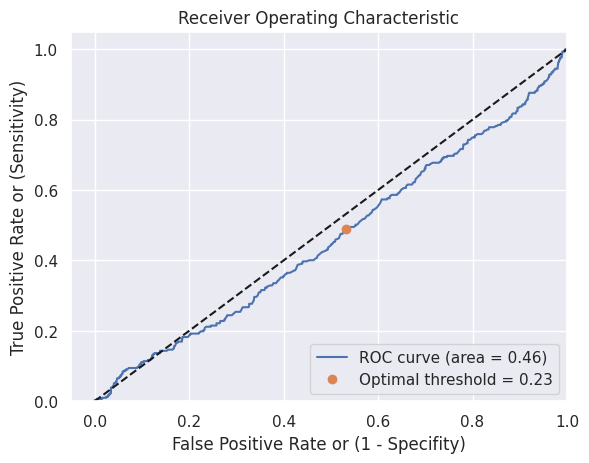

In [ ]:
# Curva ROC.
curveROC(X_train_scal, y_train, model)

####Evaluación de los resultados del test

In [ ]:
# Accuracy y error de test.
y_test_pred = model.predict(X_test_scal)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_err = 1-test_accuracy

print("Accuracy: {} \nTest error: {}".format(test_accuracy, test_err))

Accuracy: 0.7666666666666667 
Test error: 0.23333333333333328


Classification report
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       253
           1       0.00      0.00      0.00        77

    accuracy                           0.77       330
   macro avg       0.38      0.50      0.43       330
weighted avg       0.59      0.77      0.67       330

 
Matriz de confusión


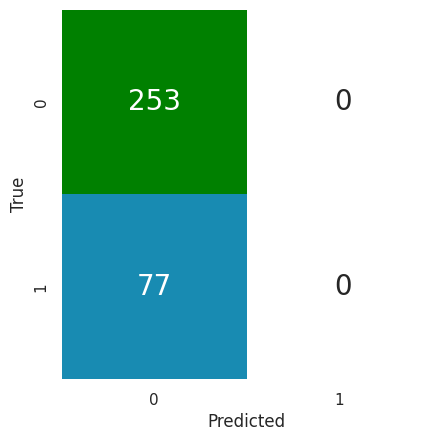

In [ ]:
# Classification report.
print('Classification report')
print(classification_report(y_test, y_test_pred))
print(' ')

# Matriz de confusión.
print('Matriz de confusión')
plot_cm(y_test, y_test_pred, clf=model)

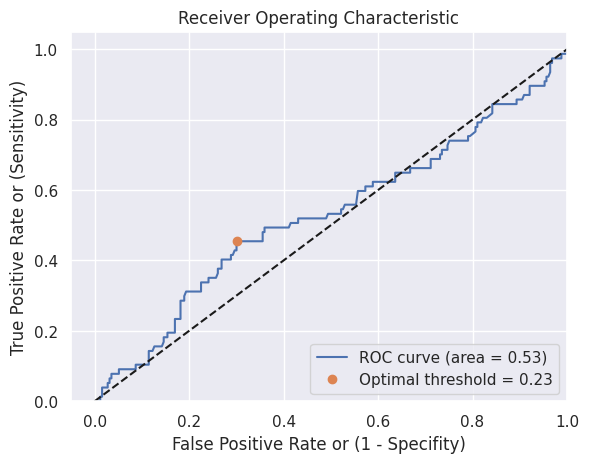

In [ ]:
# Curva ROC.
curveROC(X_test_scal, y_test, model)

### Validación cruzada

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, accuracy_score, recall_score
from sklearn.utils import resample

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # instancia al objeto cross validator con 5 folds

# Definición de las listas para almacenar las medidas de rendimiento
pre = []
acc = []
sen = []
spe = []
iter = 0
rocs = []

for train_index, test_index in skf.split(X, y):

    # Dividir datos.
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Escalar datos.
    scaler = StandardScaler()

    X_train_scal = scaler.fit_transform(X_train)
    X_test_scal = scaler.fit_transform(X_test)

    # Implementacion del clasificador (no es la unica forma, ver sklearn.base.clone)
    model_new = model.fit(X_train_scal, y_train)
    y_test_pred = model_new.predict(X_test_scal)
    pre.append(precision_score(y_test,y_test_pred))
    acc.append(accuracy_score(y_test,y_test_pred))
    sen.append(recall_score(y_test,y_test_pred))
    spe.append(recall_score(y_test,y_test_pred, pos_label=0))

    print('Interacion: ')
    print("Precision promedio = ", np.mean(pre))
    print("Accuracy promedio = ", np.mean(acc))
    print("Sensibility promedio = ", np.mean(sen))
    print("Specificity promedio = ", np.mean(spe))
    print(' ')

Interacion: 
Precision promedio =  0.0
Accuracy promedio =  0.7666666666666667
Sensibility promedio =  0.0
Specificity promedio =  1.0
 
Interacion: 
Precision promedio =  0.0
Accuracy promedio =  0.7666666666666667
Sensibility promedio =  0.0
Specificity promedio =  1.0
 
Interacion: 
Precision promedio =  0.0
Accuracy promedio =  0.7666666666666667
Sensibility promedio =  0.0
Specificity promedio =  1.0
 
Interacion: 
Precision promedio =  0.0
Accuracy promedio =  0.7666666666666667
Sensibility promedio =  0.0
Specificity promedio =  1.0
 
Interacion: 
Precision promedio =  0.0
Accuracy promedio =  0.7671327254305977
Sensibility promedio =  0.0
Specificity promedio =  1.0
 


In [ ]:
# Funcion para calcular y visualizar la matriz de confusion
def plotCM(ytrue, ypred, clases=None, normalize = False, ax = None):
    """ Funcion para calcular y visualizar la matriz de confusion"""

    from sklearn.metrics import confusion_matrix
    CM = confusion_matrix(ytrue,ypred)

    #Normaliza la matriz de confusion dividiendo cada fila por el total de verdaderos
    if normalize:
        CM = 100*CM / CM.sum(axis=1).reshape(-1,1) #Aprovechando el Broadcasting!
    if clases == None:
        clases = list(set(ytrue))    # corregido el bug, las clases deben ser con la verdad!
    df = pd.DataFrame(CM, index=clases, columns=clases)
    df.index.name = 'True'; df.columns.name = 'Predicted'

    sns.heatmap( df, # Visualizando la matriz de confusion
             annot=True, fmt='2.1f', cmap='ocean_r',cbar=False,square=True, annot_kws={'fontsize':16}, ax=ax )

#     plt.show()

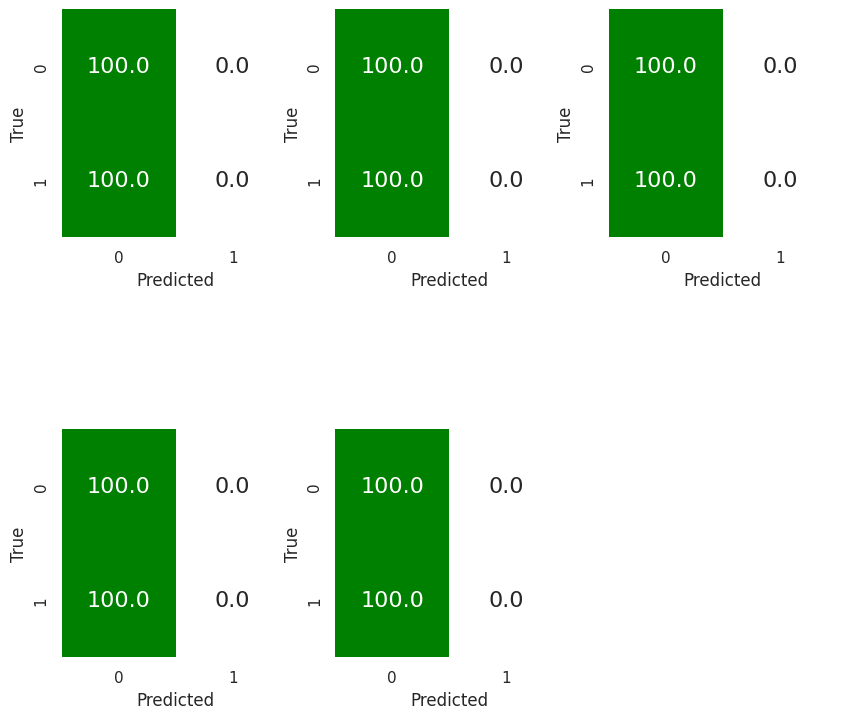

In [ ]:
from sklearn.model_selection import StratifiedKFold
import roc_utils as ru
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.metrics import precision_score, accuracy_score, recall_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # instancia al objeto cross validator con 5 folds

# Crea los ejes y las figuras para graficar en un subplot
fig, ax = plt.subplots(2,3, figsize = (10,10))
k = 0 # contador para acceder a los ejes
for train_index, test_index in skf.split(X_1,y):

    # Dividir datos.
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Escalar datos.
    scaler = StandardScaler()

    X_train_scal = scaler.fit_transform(X_train)
    X_test_scal = scaler.fit_transform(X_test)

    # Implementacion del clasificador
    model_new = model.fit(X_train_scal,y_train)
    y_pred = model_new.predict(X_test_scal)

    # Matriz de confusion especificando los ejes (aplanados)
    plotCM(y_test,y_pred,normalize=True, ax = ax.flatten()[k])
    k += 1

    # set the spacing between subplots
    fig.tight_layout()

    #Las curvas ROC de cada iteración
    y_prob = model.predict_proba(X_test)

    roc = ru.compute_roc(X=y_prob[:,1], y=y_test, pos_label=True)
    rocs.append(roc)

ax[1,2].axis('off') # No muestra el eje en la ultima posicion
plt.show()

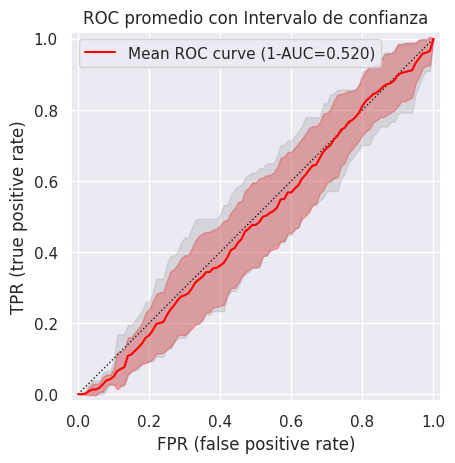

In [ ]:
# El promedio, el intervalo de tolerancia (TI) y el intervalo de confianza (IC) de las curvas ROC de cada iteración
ru.plot_mean_roc(rocs, show_ci=True, show_ti=True)
plt.title("ROC promedio con Intervalo de confianza");

### Discusión de resultados

El modelo tiene una accuracy superior al 76% tanto en el entrenamiento y el test, como en la validación cruzada. Sin embargo, el classification report y la matriz de confusión sugieren que el modelo siempre clasifica a las muestras como "0". En el classification report, el f1 de la classe 0 es considerablemente grande (y cercana a 1), mientras que el f1 de la classe 1 es 0. En la matriz de confusión, se observa que la totalidad de muestras han sido clasificadas como clase 0. En cuánto a la curva ROC, se observa que tanto en el entrenamiento como en el test la curva cruza el eje en varios puntos (en el caso del test) o esta completamente por debajo del eje (caso del entrenamiento).

Esto puede ser debido a que se han usado variables que no presentan una relación suficientemente grande con ZSN. Adicionalmente, el modelo ha sido entrenado con un número de muestras de la classe 0 mucho mayor que el de la classe 1, lo cual puede ser la razón por la cuál el modelo está "memorizando" que en la mayoría de casos el resultado es "0". La exactitud obtenida es muy elevada porqué la gran mayoría de muestras son classificadas correctamente como clase 0 porque, efectivamente, la gran mayoría de muestras pertenecen a esta clase. Sin embargo, esto significa que el modelo tiene una baja capabilidad para generalizar.

En definitiva, el modelo 1, dónde se predice la variable ZSN a partir de las variables AGE y ROE, no es un buen clasificador de ZSN.

## Modelo 2: Combinación 2

### Dividir los datos

In [ ]:
X = X_2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Escalamiento de datos

In [ ]:
scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.fit_transform(X_test)

### Optimización de hiperparámetros

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Combinaciones de hiperparámetros a estudiar.
param_grid = {'C': [0.001, 0.1, 1, 10, 100],
              'gamma': ['auto', 1, 0.01, 0.0001, 0.00001],
              'kernel': ['sigmoid'],
              'coef0': [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]}

# Crear el grid.
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# Iniciar la búsqueda de la mejor combinación de hiperparámetros.
grid.fit(X_train_scal, y_train)

Fitting 5 folds for each of 275 candidates, totalling 1375 fits
[CV 1/5] END C=0.001, coef0=-5, gamma=auto, kernel=sigmoid;, score=0.769 total time=   0.1s
[CV 2/5] END C=0.001, coef0=-5, gamma=auto, kernel=sigmoid;, score=0.769 total time=   0.0s
[CV 3/5] END C=0.001, coef0=-5, gamma=auto, kernel=sigmoid;, score=0.765 total time=   0.0s
[CV 4/5] END C=0.001, coef0=-5, gamma=auto, kernel=sigmoid;, score=0.765 total time=   0.1s
[CV 5/5] END C=0.001, coef0=-5, gamma=auto, kernel=sigmoid;, score=0.768 total time=   0.0s
[CV 1/5] END C=0.001, coef0=-5, gamma=1, kernel=sigmoid;, score=0.769 total time=   0.1s
[CV 2/5] END C=0.001, coef0=-5, gamma=1, kernel=sigmoid;, score=0.769 total time=   0.0s
[CV 3/5] END C=0.001, coef0=-5, gamma=1, kernel=sigmoid;, score=0.765 total time=   0.1s
[CV 4/5] END C=0.001, coef0=-5, gamma=1, kernel=sigmoid;, score=0.765 total time=   0.1s
[CV 5/5] END C=0.001, coef0=-5, gamma=1, kernel=sigmoid;, score=0.768 total time=   0.0s
[CV 1/5] END C=0.001, coef0=-5,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 1, 10, 100],
                         'coef0': [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5],
                         'gamma': ['auto', 1, 0.01, 0.0001, 1e-05],
                         'kernel': ['sigmoid']},
             verbose=3)

In [ ]:
# Visualizar los mejores parámetros.
print(grid.best_params_)

{'C': 100, 'coef0': -1, 'gamma': 0.01, 'kernel': 'sigmoid'}


### Entrenamiento del modelo

In [ ]:
from sklearn.svm import SVC

# Creación del modelo SVC.
model = SVC(C=100, coef0=-1, gamma=0.01, kernel='sigmoid', probability=True)

# Entrenamiento.
model.fit(X_train_scal, y_train)

SVC(C=100, coef0=-1, gamma=0.01, kernel='sigmoid', probability=True)

### Evaluación del modelo

####Evaluación de los resultados del entrenamiento

In [ ]:
# Accuracy y error de entrenamiento.
y_train_pred = model.predict(X_train_scal)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_err = 1-train_accuracy

print("Accuracy: {} \nTrainig error: {}".format(train_accuracy, train_err))

Accuracy: 0.800606520090978 
Trainig error: 0.199393479909022


Classification report
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1012
           1       0.66      0.29      0.40       307

    accuracy                           0.80      1319
   macro avg       0.74      0.62      0.64      1319
weighted avg       0.78      0.80      0.77      1319

 
Matriz de confusión


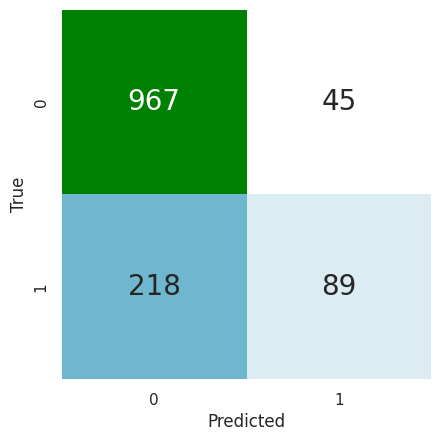

In [ ]:
# Classification report.
print('Classification report')
print(classification_report(y_train, y_train_pred))
print(' ')

# Matriz de confusión.
print('Matriz de confusión')
plot_cm(y_train, y_train_pred, clf=model)

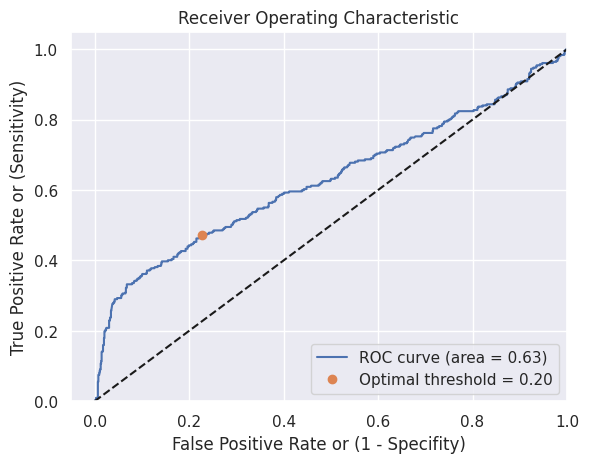

In [ ]:
# Curva ROC.
curveROC(X_train_scal, y_train, model)

####Evaluación de los resultados del test

In [ ]:
# Accuracy y error de test.
y_test_pred = model.predict(X_test_scal)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_err = 1-test_accuracy

print("Accuracy: {} \nTest error: {}".format(test_accuracy, test_err))

Accuracy: 0.7666666666666667 
Test error: 0.23333333333333328


Classification report
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       253
           1       0.50      0.23      0.32        77

    accuracy                           0.77       330
   macro avg       0.65      0.58      0.59       330
weighted avg       0.73      0.77      0.73       330

 
Matriz de confusión


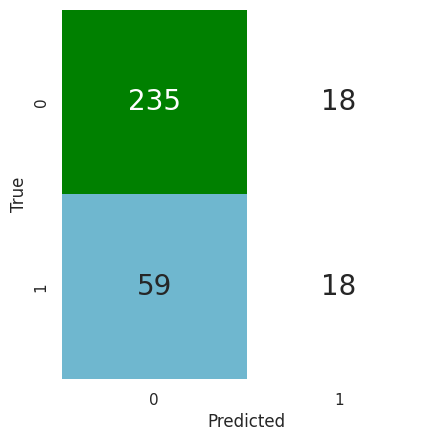

In [ ]:
# Classification report.
print('Classification report')
print(classification_report(y_test, y_test_pred))
print(' ')

# Matriz de confusión.
print('Matriz de confusión')
plot_cm(y_test, y_test_pred, clf=model)

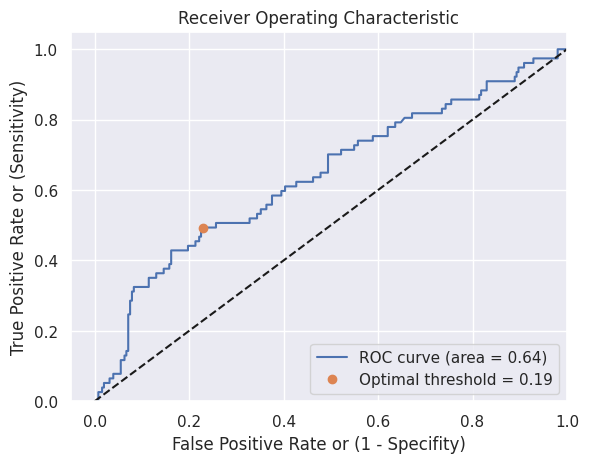

In [ ]:
# Curva ROC.
curveROC(X_test_scal, y_test, model)

### Validación cruzada

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # instancia al objeto cross validator con 5 folds

# Definición de las listas para almacenar las medidas de rendimiento
pre = []
acc = []
sen = []
spe = []
iter = 0
rocs = []

for train_index, test_index in skf.split(X, y):

    # Dividir datos.
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Escalar datos.
    scaler = StandardScaler()

    X_train_scal = scaler.fit_transform(X_train)
    X_test_scal = scaler.fit_transform(X_test)

    # Implementacion del clasificador (no es la unica forma, ver sklearn.base.clone)
    model_new = model.fit(X_train_scal, y_train)
    y_test_pred = model_new.predict(X_test_scal)
    pre.append(precision_score(y_test,y_test_pred))
    acc.append(accuracy_score(y_test,y_test_pred))
    sen.append(recall_score(y_test,y_test_pred))
    spe.append(recall_score(y_test,y_test_pred, pos_label=0))

    print('Interacion: ')
    print("Precision promedio = ", np.mean(pre))
    print("Accuracy promedio = ", np.mean(acc))
    print("Sensibility promedio = ", np.mean(sen))
    print("Specificity promedio = ", np.mean(spe))
    print(' ')

Interacion: 
Precision promedio =  0.6842105263157895
Accuracy promedio =  0.8090909090909091
Sensibility promedio =  0.33766233766233766
Specificity promedio =  0.9525691699604744
 
Interacion: 
Precision promedio =  0.6858552631578947
Accuracy promedio =  0.806060606060606
Sensibility promedio =  0.3116883116883117
Specificity promedio =  0.9565217391304348
 
Interacion: 
Precision promedio =  0.6631191950464396
Accuracy promedio =  0.801010101010101
Sensibility promedio =  0.2987012987012987
Specificity promedio =  0.9538866930171278
 
Interacion: 
Precision promedio =  0.6454875444329778
Accuracy promedio =  0.7962121212121211
Sensibility promedio =  0.275974025974026
Specificity promedio =  0.9545454545454546
 
Interacion: 
Precision promedio =  0.6240823432386899
Accuracy promedio =  0.7925927972736483
Sensibility promedio =  0.27604237867395764
Specificity promedio =  0.9494071146245059
 


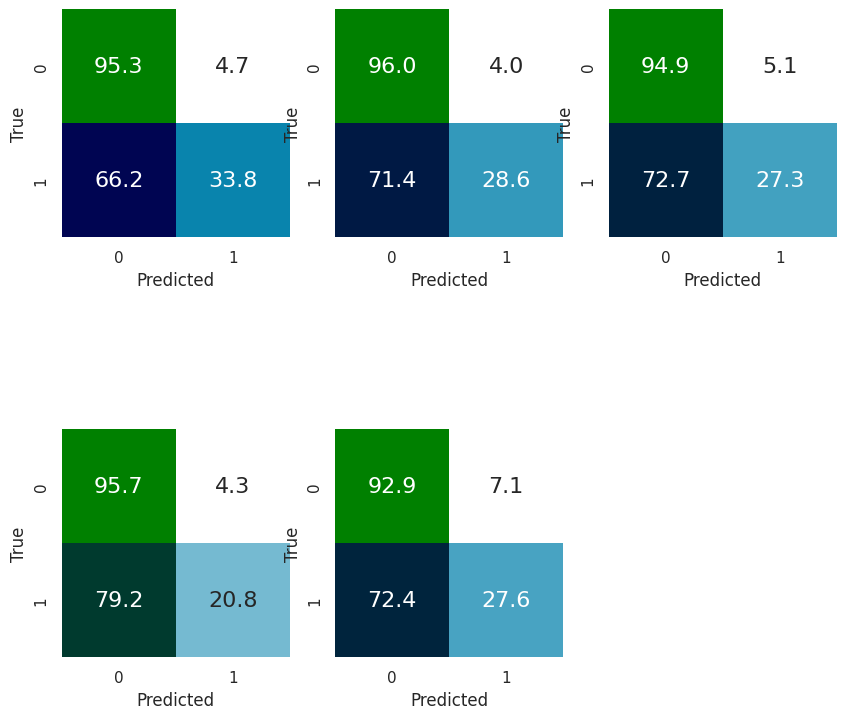

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # instancia al objeto cross validator con 5 folds

# Crea los ejes y las figuras para graficar en un subplot
fig, ax = plt.subplots(2,3, figsize = (10,10))
k = 0 # contador para acceder a los ejes
for train_index, test_index in skf.split(X,y):

    # Dividir datos.
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Escalar datos.
    scaler = StandardScaler()

    X_train_scal = scaler.fit_transform(X_train)
    X_test_scal = scaler.fit_transform(X_test)

    # Implementacion del clasificador
    model_new = model.fit(X_train_scal,y_train)
    y_pred = model_new.predict(X_test_scal)

    # Matriz de confusion especificando los ejes (aplanados)
    plotCM(y_test,y_pred,normalize=True, ax = ax.flatten()[k])
    k += 1

    # set the spacing between subplots
    fig.tight_layout()

    #Las curvas ROC de cada iteración
    y_prob = model.predict_proba(X_test)

    roc = ru.compute_roc(X=y_prob[:,1], y=y_test, pos_label=True)
    rocs.append(roc)

ax[1,2].axis('off') # No muestra el eje en la ultima posicion
plt.show()

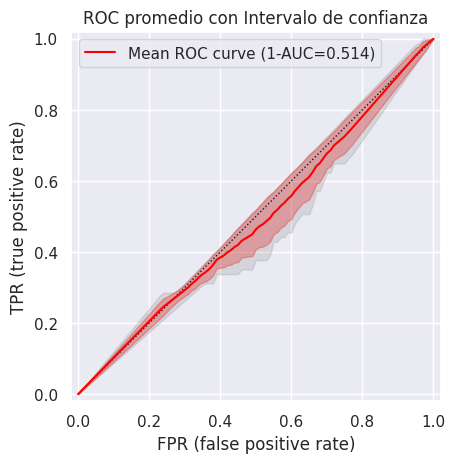

In [ ]:
# El promedio, el intervalo de tolerancia (TI) y el intervalo de confianza (IC) de las curvas ROC de cada iteración
ru.plot_mean_roc(rocs, show_ci=True, show_ti=True)
plt.title("ROC promedio con Intervalo de confianza");

### Discusión de resultados

Este segundo modelo presenta mejoras respecto al anterior; Observando la validación cruzada, junto con los resultados del entrenamiento y el test, la exactitud alcanzada es de aproximadamente 79% en todos los casos. En el clasificaction report se observa que la precision y el recall de la classe 1 ha mejorado, lo que significa que el modelo 2 es capaz de generalizar mejor que el primero. Esto se corresponde con los resultados de las matrices de confusión, ya que en todas se puede observar que algunas muestras de la clase 1 del test (y el entrenamiento) han sido predecidas correctamente como verdaderas y, por lo tanto, el modelo ya no ha "aprendido" a predecir todas las muestras como pertenecientes a la classe 0. El valor de AUC que se observa en la curva ROC también ha incrementado, lo cuál confirma que este segundo modelo es mejor que el anterior.

A pesar de las mejoras respecto al modelo anterior, cabe destacar que los resultados obtenidos siguen siendo bajos. La exactitud es elevada porque, nuevamente, la gran mayoría de muestras pertenecen a la classe 0 y son classificadas correctamente porqué el modelo tiende a clasificar las muestras como clase 0 (porque ha aprendido que la probabilidad que una muestra pertenezca a esta muestra es mayor).

En definitiva, el modelo 2, dónde se predice la variable ZSN a partir de las variables AGE, ALT_BLOOD, ZSN_A, y ROE, no es un buen clasificador de ZSN.

## Modelo 3: Combinación 3

### Dividir los datos

In [ ]:
X = X_3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Escalamiento de datos

In [ ]:
scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.fit_transform(X_test)

### Optimización de hiperparámetros

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Combinaciones de hiperparámetros a estudiar.
param_grid = {'C': [0.001, 0.1, 1, 10, 100],
              'gamma': ['auto', 1, 0.01, 0.0001, 0.00001],
              'kernel': ['sigmoid'],
              'coef0': [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]}

# Crear el grid.
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# Iniciar la búsqueda de la mejor combinación de hiperparámetros.
grid.fit(X_train_scal, y_train)

Fitting 5 folds for each of 275 candidates, totalling 1375 fits
[CV 1/5] END C=0.001, coef0=-5, gamma=auto, kernel=sigmoid;, score=0.769 total time=   0.1s
[CV 2/5] END C=0.001, coef0=-5, gamma=auto, kernel=sigmoid;, score=0.769 total time=   0.0s
[CV 3/5] END C=0.001, coef0=-5, gamma=auto, kernel=sigmoid;, score=0.765 total time=   0.1s
[CV 4/5] END C=0.001, coef0=-5, gamma=auto, kernel=sigmoid;, score=0.765 total time=   0.1s
[CV 5/5] END C=0.001, coef0=-5, gamma=auto, kernel=sigmoid;, score=0.768 total time=   0.1s
[CV 1/5] END C=0.001, coef0=-5, gamma=1, kernel=sigmoid;, score=0.769 total time=   0.1s
[CV 2/5] END C=0.001, coef0=-5, gamma=1, kernel=sigmoid;, score=0.769 total time=   0.1s
[CV 3/5] END C=0.001, coef0=-5, gamma=1, kernel=sigmoid;, score=0.765 total time=   0.1s
[CV 4/5] END C=0.001, coef0=-5, gamma=1, kernel=sigmoid;, score=0.765 total time=   0.1s
[CV 5/5] END C=0.001, coef0=-5, gamma=1, kernel=sigmoid;, score=0.768 total time=   0.1s
[CV 1/5] END C=0.001, coef0=-5,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 1, 10, 100],
                         'coef0': [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5],
                         'gamma': ['auto', 1, 0.01, 0.0001, 1e-05],
                         'kernel': ['sigmoid']},
             verbose=3)

In [ ]:
# Visualizar los mejores parámetros.
print(grid.best_params_)

{'C': 100, 'coef0': -1, 'gamma': 0.01, 'kernel': 'sigmoid'}


### Entrenamiento del modelo

In [ ]:
from sklearn.svm import SVC

# Creación del modelo SVC.
model = SVC(C=100, coef0=-1, gamma=0.01, kernel='sigmoid', probability=True)

# Entrenamiento.
model.fit(X_train_scal, y_train)

SVC(C=100, coef0=-1, gamma=0.01, kernel='sigmoid', probability=True)

### Evaluación del modelo

####Evaluación de los resultados del entrenamiento

In [ ]:
# Accuracy y error de entrenamiento.
y_train_pred = model.predict(X_train_scal)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_err = 1-train_accuracy

print("Accuracy: {} \nTrainig error: {}".format(train_accuracy, train_err))

Accuracy: 0.7998483699772555 
Trainig error: 0.2001516300227445


Classification report
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1012
           1       0.66      0.29      0.41       307

    accuracy                           0.80      1319
   macro avg       0.74      0.62      0.64      1319
weighted avg       0.78      0.80      0.77      1319

 
Matriz de confusión


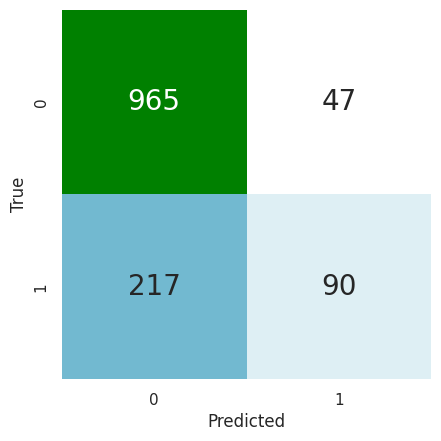

In [ ]:
# Classification report.
print('Classification report')
print(classification_report(y_train, y_train_pred))
print(' ')

# Matriz de confusión.
print('Matriz de confusión')
plot_cm(y_train, y_train_pred, clf=model)

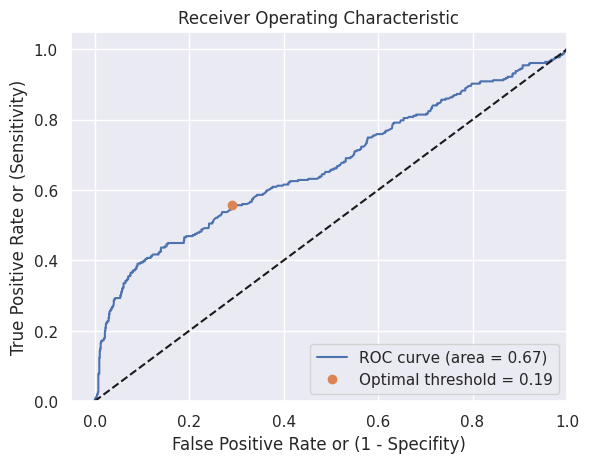

In [ ]:
# Curva ROC.
curveROC(X_train_scal, y_train, model)

####Evaluación de los resultados del test

In [ ]:
# Accuracy y error de test.
y_test_pred = model.predict(X_test_scal)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_err = 1-test_accuracy

print("Accuracy: {} \nTest error: {}".format(test_accuracy, test_err))

Accuracy: 0.7666666666666667 
Test error: 0.23333333333333328


Classification report
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       253
           1       0.50      0.26      0.34        77

    accuracy                           0.77       330
   macro avg       0.65      0.59      0.60       330
weighted avg       0.73      0.77      0.74       330

 
Matriz de confusión


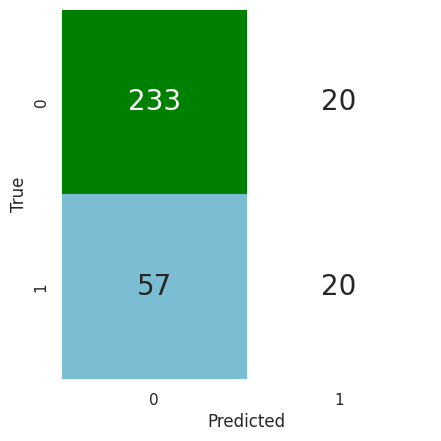

In [ ]:
# Classification report.
print('Classification report')
print(classification_report(y_test, y_test_pred))
print(' ')

# Matriz de confusión.
print('Matriz de confusión')
plot_cm(y_test, y_test_pred, clf=model)

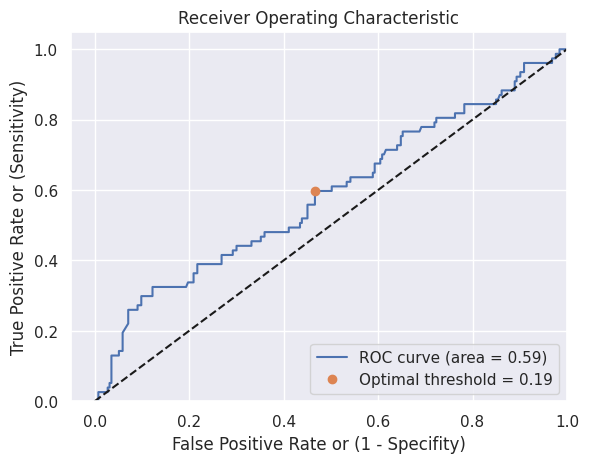

In [ ]:
# Curva ROC.
curveROC(X_test_scal, y_test, model)

### Validación cruzada

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # instancia al objeto cross validator con 5 folds

# Definición de las listas para almacenar las medidas de rendimiento
pre = []
acc = []
sen = []
spe = []
iter = 0
rocs = []

for train_index, test_index in skf.split(X, y):

    # Dividir datos.
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Escalar datos.
    scaler = StandardScaler()

    X_train_scal = scaler.fit_transform(X_train)
    X_test_scal = scaler.fit_transform(X_test)

    # Implementacion del clasificador (no es la unica forma, ver sklearn.base.clone)
    model_new = model.fit(X_train_scal, y_train)
    y_test_pred = model_new.predict(X_test_scal)
    pre.append(precision_score(y_test,y_test_pred))
    acc.append(accuracy_score(y_test,y_test_pred))
    sen.append(recall_score(y_test,y_test_pred))
    spe.append(recall_score(y_test,y_test_pred, pos_label=0))

    print('Interacion: ')
    print("Precision promedio = ", np.mean(pre))
    print("Accuracy promedio = ", np.mean(acc))
    print("Sensibility promedio = ", np.mean(sen))
    print("Specificity promedio = ", np.mean(spe))
    print(' ')

Interacion: 
Precision promedio =  0.6923076923076923
Accuracy promedio =  0.8121212121212121
Sensibility promedio =  0.35064935064935066
Specificity promedio =  0.9525691699604744
 
Interacion: 
Precision promedio =  0.6843891402714932
Accuracy promedio =  0.8075757575757576
Sensibility promedio =  0.3246753246753247
Specificity promedio =  0.9545454545454546
 
Interacion: 
Precision promedio =  0.6507038712921066
Accuracy promedio =  0.7999999999999999
Sensibility promedio =  0.30735930735930733
Specificity promedio =  0.9499341238471674
 
Interacion: 
Precision promedio =  0.6361760516172281
Accuracy promedio =  0.7954545454545454
Sensibility promedio =  0.2824675324675325
Specificity promedio =  0.9515810276679841
 
Interacion: 
Precision promedio =  0.6256075079604492
Accuracy promedio =  0.7938104448742747
Sensibility promedio =  0.28123718386876284
Specificity promedio =  0.9494071146245059
 


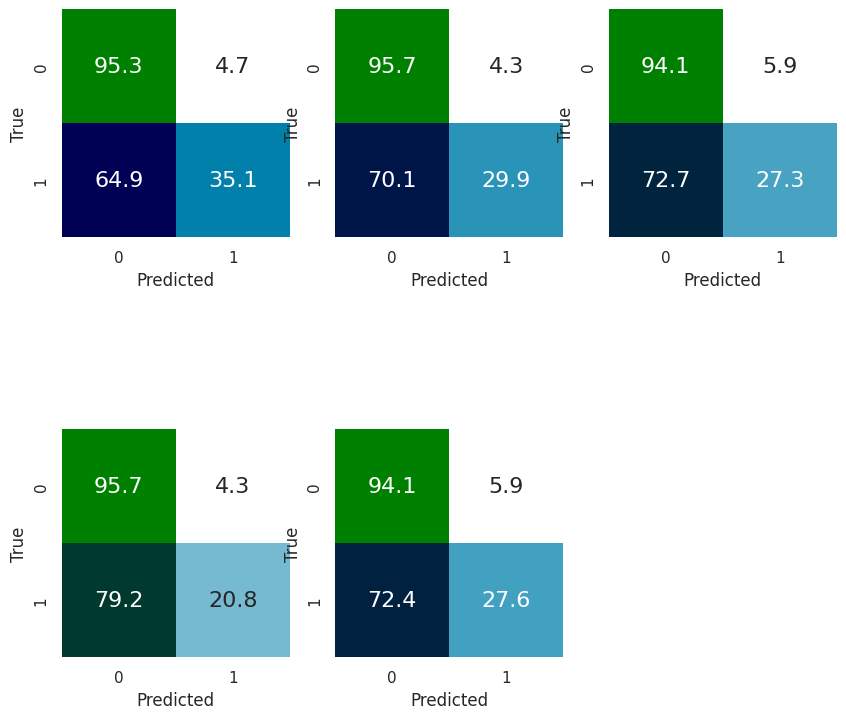

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # instancia al objeto cross validator con 5 folds

# Crea los ejes y las figuras para graficar en un subplot
fig, ax = plt.subplots(2,3, figsize = (10,10))
k = 0 # contador para acceder a los ejes
for train_index, test_index in skf.split(X,y):

    # Dividir datos.
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Escalar datos.
    scaler = StandardScaler()

    X_train_scal = scaler.fit_transform(X_train)
    X_test_scal = scaler.fit_transform(X_test)

    # Implementacion del clasificador
    model_new = model.fit(X_train_scal,y_train)
    y_pred = model_new.predict(X_test_scal)

    # Matriz de confusion especificando los ejes (aplanados)
    plotCM(y_test,y_pred,normalize=True, ax = ax.flatten()[k])
    k += 1

    # set the spacing between subplots
    fig.tight_layout()

    #Las curvas ROC de cada iteración
    y_prob = model.predict_proba(X_test)

    roc = ru.compute_roc(X=y_prob[:,1], y=y_test, pos_label=True)
    rocs.append(roc)

ax[1,2].axis('off') # No muestra el eje en la ultima posicion
plt.show()

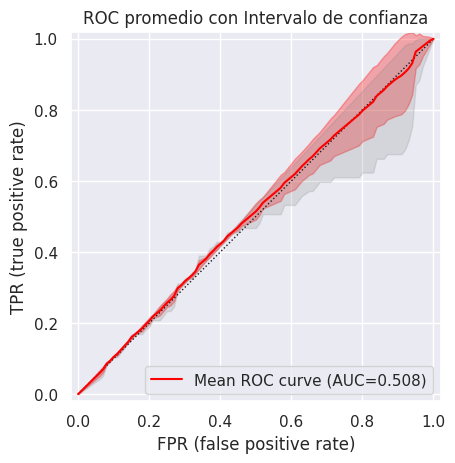

In [ ]:
# El promedio, el intervalo de tolerancia (TI) y el intervalo de confianza (IC) de las curvas ROC de cada iteración
ru.plot_mean_roc(rocs, show_ci=True, show_ti=True)
plt.title("ROC promedio con Intervalo de confianza");

### Discusión de resultados

En este caso, el modelo presenta resultados muy parecidos al modelo anterior, pero ligeramente peor. Esto se puede comprovar a partir de la AUC de la ROC, que tiene un valor ligeramente menor en el test y el entrenamiento.

En definitiva, el modelo 3, dónde se predice la variable ZSN a partir de las variables AGE, ZSN_A, OTEK_LANC, SEX y ALT_BLOOD, no es un buen clasificador de ZSN.

## Modelo 3: Combinación 4

### Dividir los datos

In [ ]:
X = X_4

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Escalamiento de datos

In [ ]:
scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.fit_transform(X_test)

### Optimización de hiperparámetros

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Combinaciones de hiperparámetros a estudiar.
param_grid = {'C': [0.001, 0.1, 1, 10, 100],
              'gamma': ['auto', 1, 0.01, 0.0001, 0.00001],
              'kernel': ['sigmoid'],
              'coef0': [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]}

# Crear el grid.
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# Iniciar la búsqueda de la mejor combinación de hiperparámetros.
grid.fit(X_train_scal, y_train)

Fitting 5 folds for each of 275 candidates, totalling 1375 fits
[CV 1/5] END C=0.001, coef0=-5, gamma=auto, kernel=sigmoid;, score=0.769 total time=   0.0s
[CV 2/5] END C=0.001, coef0=-5, gamma=auto, kernel=sigmoid;, score=0.769 total time=   0.1s
[CV 3/5] END C=0.001, coef0=-5, gamma=auto, kernel=sigmoid;, score=0.765 total time=   0.1s
[CV 4/5] END C=0.001, coef0=-5, gamma=auto, kernel=sigmoid;, score=0.765 total time=   0.1s
[CV 5/5] END C=0.001, coef0=-5, gamma=auto, kernel=sigmoid;, score=0.768 total time=   0.1s
[CV 1/5] END C=0.001, coef0=-5, gamma=1, kernel=sigmoid;, score=0.769 total time=   0.1s
[CV 2/5] END C=0.001, coef0=-5, gamma=1, kernel=sigmoid;, score=0.769 total time=   0.1s
[CV 3/5] END C=0.001, coef0=-5, gamma=1, kernel=sigmoid;, score=0.765 total time=   0.1s
[CV 4/5] END C=0.001, coef0=-5, gamma=1, kernel=sigmoid;, score=0.765 total time=   0.1s
[CV 5/5] END C=0.001, coef0=-5, gamma=1, kernel=sigmoid;, score=0.768 total time=   0.1s
[CV 1/5] END C=0.001, coef0=-5,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 1, 10, 100],
                         'coef0': [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5],
                         'gamma': ['auto', 1, 0.01, 0.0001, 1e-05],
                         'kernel': ['sigmoid']},
             verbose=3)

In [ ]:
# Visualizar los mejores parámetros.
print(grid.best_params_)

{'C': 100, 'coef0': -1, 'gamma': 0.01, 'kernel': 'sigmoid'}


### Entrenamiento del modelo

In [ ]:
from sklearn.svm import SVC

# Creación del modelo SVC.
model = SVC(C=100, coef0=-1, gamma=0.01, kernel='sigmoid', probability=True)

# Entrenamiento.
model.fit(X_train_scal, y_train)

SVC(C=100, coef0=-1, gamma=0.01, kernel='sigmoid', probability=True)

### Evaluación del modelo

####Evaluación de los resultados del entrenamiento

In [ ]:
# Accuracy y error de entrenamiento.
y_train_pred = model.predict(X_train_scal)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_err = 1-train_accuracy

print("Accuracy: {} \nTrainig error: {}".format(train_accuracy, train_err))

Accuracy: 0.800606520090978 
Trainig error: 0.199393479909022


Classification report
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1012
           1       0.66      0.29      0.40       307

    accuracy                           0.80      1319
   macro avg       0.74      0.62      0.64      1319
weighted avg       0.78      0.80      0.77      1319

 
Matriz de confusión


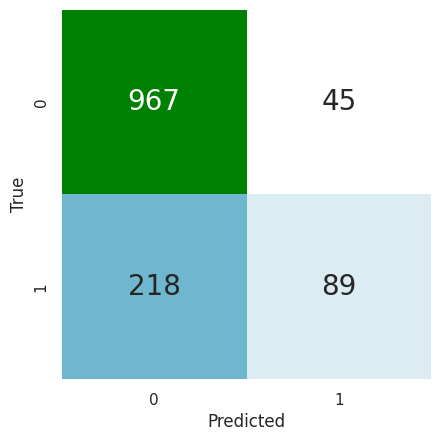

In [ ]:
# Classification report.
print('Classification report')
print(classification_report(y_train, y_train_pred))
print(' ')

# Matriz de confusión.
print('Matriz de confusión')
plot_cm(y_train, y_train_pred, clf=model)

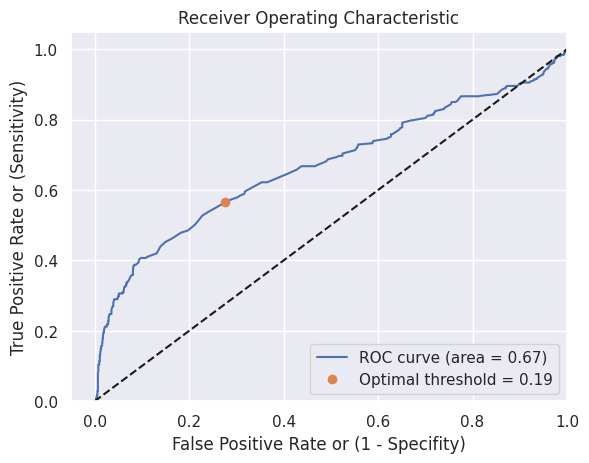

In [ ]:
# Curva ROC.
curveROC(X_train_scal, y_train, model)

####Evaluación de los resultados del test

In [ ]:
# Accuracy y error de test.
y_test_pred = model.predict(X_test_scal)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_err = 1-test_accuracy

print("Accuracy: {} \nTest error: {}".format(test_accuracy, test_err))

Accuracy: 0.7696969696969697 
Test error: 0.23030303030303034


Classification report
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       253
           1       0.51      0.23      0.32        77

    accuracy                           0.77       330
   macro avg       0.66      0.58      0.59       330
weighted avg       0.73      0.77      0.74       330

 
Matriz de confusión


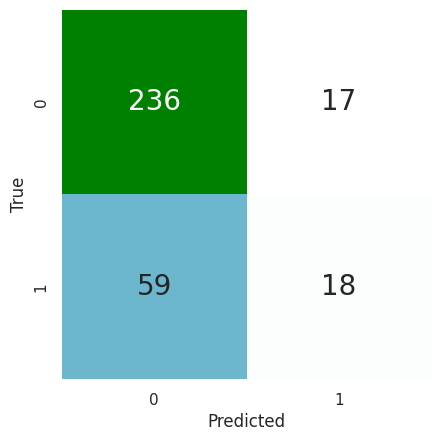

In [ ]:
# Classification report.
print('Classification report')
print(classification_report(y_test, y_test_pred))
print(' ')

# Matriz de confusión.
print('Matriz de confusión')
plot_cm(y_test, y_test_pred, clf=model)

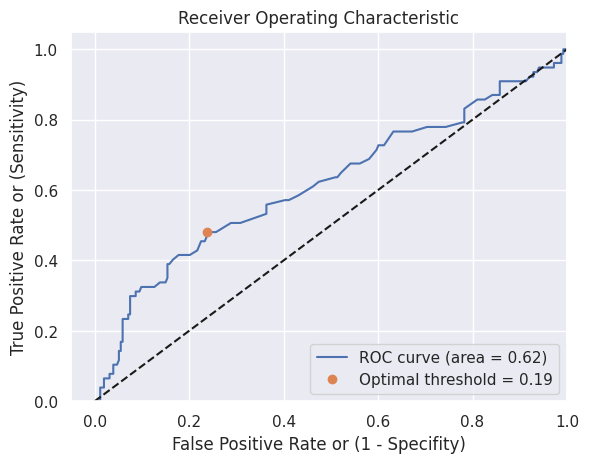

In [ ]:
# Curva ROC.
curveROC(X_test_scal, y_test, model)

### Validación cruzada

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # instancia al objeto cross validator con 5 folds

# Definición de las listas para almacenar las medidas de rendimiento
pre = []
acc = []
sen = []
spe = []
iter = 0
rocs = []

for train_index, test_index in skf.split(X, y):

    # Dividir datos.
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Escalar datos.
    scaler = StandardScaler()

    X_train_scal = scaler.fit_transform(X_train)
    X_test_scal = scaler.fit_transform(X_test)

    # Implementacion del clasificador (no es la unica forma, ver sklearn.base.clone)
    model_new = model.fit(X_train_scal, y_train)
    y_test_pred = model_new.predict(X_test_scal)
    pre.append(precision_score(y_test,y_test_pred))
    acc.append(accuracy_score(y_test,y_test_pred))
    sen.append(recall_score(y_test,y_test_pred))
    spe.append(recall_score(y_test,y_test_pred, pos_label=0))

    print('Interacion: ')
    print("Precision promedio = ", np.mean(pre))
    print("Accuracy promedio = ", np.mean(acc))
    print("Sensibility promedio = ", np.mean(sen))
    print("Specificity promedio = ", np.mean(spe))
    print(' ')

Interacion: 
Precision promedio =  0.6842105263157895
Accuracy promedio =  0.8090909090909091
Sensibility promedio =  0.33766233766233766
Specificity promedio =  0.9525691699604744
 
Interacion: 
Precision promedio =  0.6706766917293233
Accuracy promedio =  0.8045454545454546
Sensibility promedio =  0.3181818181818182
Specificity promedio =  0.9525691699604744
 
Interacion: 
Precision promedio =  0.64156223893066
Accuracy promedio =  0.797979797979798
Sensibility promedio =  0.30303030303030304
Specificity promedio =  0.9486166007905138
 
Interacion: 
Precision promedio =  0.6228383458646616
Accuracy promedio =  0.7931818181818182
Sensibility promedio =  0.2824675324675325
Specificity promedio =  0.9486166007905138
 
Interacion: 
Precision promedio =  0.605962984384037
Accuracy promedio =  0.790168554849406
Sensibility promedio =  0.28123718386876284
Specificity promedio =  0.9446640316205533
 


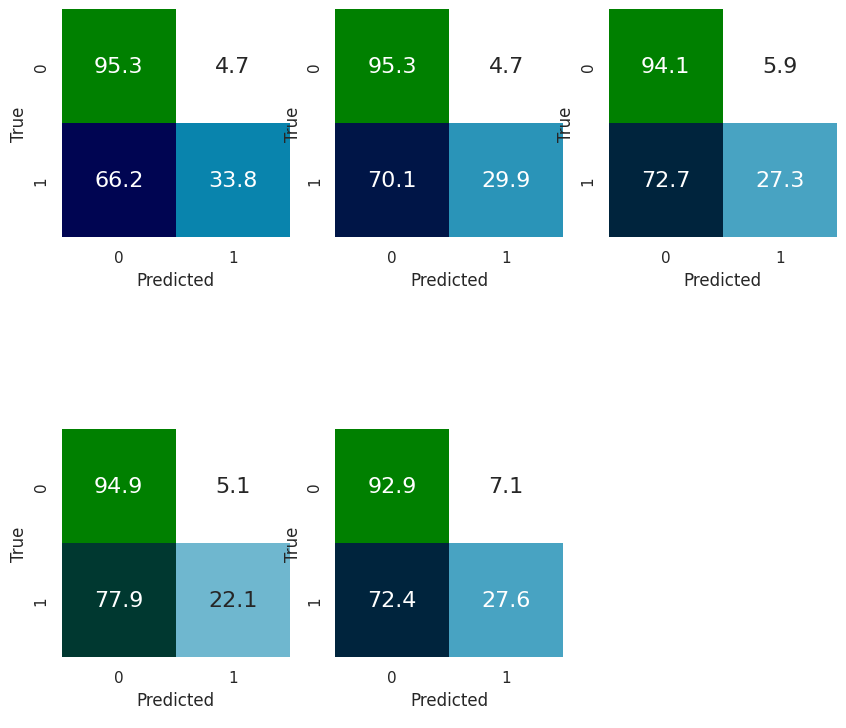

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # instancia al objeto cross validator con 5 folds

# Crea los ejes y las figuras para graficar en un subplot
fig, ax = plt.subplots(2,3, figsize = (10,10))
k = 0 # contador para acceder a los ejes
for train_index, test_index in skf.split(X,y):

    # Dividir datos.
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Escalar datos.
    scaler = StandardScaler()

    X_train_scal = scaler.fit_transform(X_train)
    X_test_scal = scaler.fit_transform(X_test)

    # Implementacion del clasificador
    model_new = model.fit(X_train_scal,y_train)
    y_pred = model_new.predict(X_test_scal)

    # Matriz de confusion especificando los ejes (aplanados)
    plotCM(y_test,y_pred,normalize=True, ax = ax.flatten()[k])
    k += 1

    # set the spacing between subplots
    fig.tight_layout()

    #Las curvas ROC de cada iteración
    y_prob = model.predict_proba(X_test)

    roc = ru.compute_roc(X=y_prob[:,1], y=y_test, pos_label=True)
    rocs.append(roc)

ax[1,2].axis('off') # No muestra el eje en la ultima posicion
plt.show()

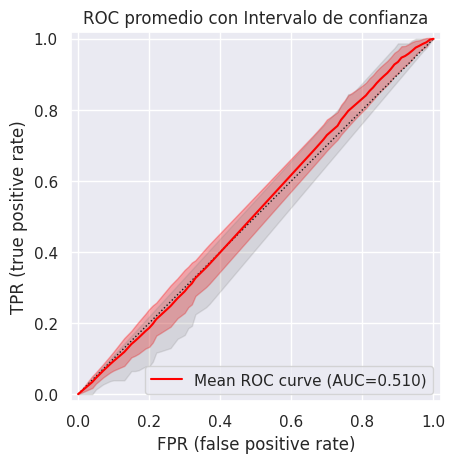

In [ ]:
# El promedio, el intervalo de tolerancia (TI) y el intervalo de confianza (IC) de las curvas ROC de cada iteración
ru.plot_mean_roc(rocs, show_ci=True, show_ti=True)
plt.title("ROC promedio con Intervalo de confianza");

### Discusión de resultados

En este caso, el modelo presenta resultados muy parecidos a los observados en los dos modelos anteriores.

En definitiva, el modelo 4, dónde se predice la variable ZSN a partir de las variables AGE, ZSN_A, OTEK_LANC, endocr_01 y zab_leg_01 no es un buen clasificador de ZSN.